In [4]:
!pip install -q --upgrade langchain langchain-openai langchain-core langchain-community langchain_chroma langgraph pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 2.7 MB/s eta 0:00:00


In [3]:
import os
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")

## Agent 1: Simple Bot
1. Define state structure with a list of `HumanMessage` Objects.
2. Initialize a `GPT-4o` model using LangChain's ChatOpenAI.
3. Sending and handling different types of messages.
4. Building and Compiling the graph of the Agent.

**Main Goal**: How to integrate LLMs in Graphs.

In [ ]:
from typing import TypedDict, List, Union
from langchain_core.messages import HumanMessage, AIMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END


In [ ]:
class AgentState(TypedDict):
  message: List[HumanMessage]

In [ ]:
llm = ChatOpenAI(model_name="gpt-4o")

In [ ]:
def process(state: AgentState) -> AgentState:
  response = llm.invoke(state["message"])
  print(f"\nAI: {response.content}")
  return state

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)

agent = graph.compile()

In [ ]:
user_input = input("Enter: ")
while user_input != "exit":
  agent.invoke({"message": [HumanMessage(content=user_input)]})
  user_input = input("Enter: ")

Enter: hello

AI: Hello! How can I assist you today?
Enter: who are you

AI: I am an AI language model created by OpenAI, known as GPT-4. I'm designed to assist with a wide range of questions and tasks, from providing information and answering queries to generating creative content and assisting with problem-solving. How can I assist you today?
Enter: what are your capabilities

AI: I have a wide range of capabilities that can assist you with various tasks. Here are some of the key things I can do:

1. **Provide Information and Answer Questions**: I can provide information and answer questions across numerous domains including science, technology, history, culture, and more.

2. **Language Assistance**: I can help with language translation, grammar, and vocabulary for numerous languages.

3. **Writing Assistance**: I can assist with writing tasks such as drafting emails, creating content, editing text, and offering style suggestions.

4. **Learning and Education**: I can help explain c

## Agent 2: Chatbot With Memory
1. Use different message types - `HumanMessage` and `AIMessage`
2. Maintain a full conversation history using both message types.
3. Create a coversation loop.
**Main Goal** Create a form of memory for our Agent.

In [ ]:
class AgentState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage]]

In [ ]:
def process(state: AgentState) -> AgentState:
    """This node will solve the request you input"""
    response = llm.invoke(state["messages"])

    state["messages"].append(AIMessage(content=response.content))
    print(f"\nAI: {response.content}")
    print("\nCURRENT STATE: ", state["messages"])

    return state


In [ ]:
graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)
agent = graph.compile()

In [ ]:
conversation_history = []

In [ ]:
user_input = input("Enter: ")

while user_input != "exit":
  conversation_history.append(HumanMessage(content=user_input))
  result = agent.invoke({"messages":conversation_history})
  conversation_history = result["messages"]
  user_input = input("Enter: ")

with open("logging.txt", "w") as file:
  file.write("Your conversation Log:\n")
  for message in conversation_history:
    if isinstance(message, HumanMessage):
      file.write(f"You: {message.content}\n")
    elif isinstance(message, AIMessage):
      file.write(f"AI: {message.content}\n\n")
  file.write("End of Conversation")

print("Conversation saved to logging.txt")

Enter: Hello I am Najmus

AI: Hello Najmus! It's great to meet you. How can I assist you today?

CURRENT STATE:  [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hello I am Najmus', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello Najmus! It's great to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={})]
Enter: tell me a joke

AI: Sure, here's a classic one for you:

Why don't scientists trust atoms?

Because they make up everything! 

I hope that brings a smile to your face!

CURRENT STATE:  [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hello I am Najmus', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello Najmus! It

## Agent 3: ReAct Agent(Reasoning and Acting Agent)
1. Learn how to create `Tools` in LangGraph
2. How to create a `ReAct Graph`
3. Work with different types of `Messages` such as `ToolMessages`
4. Test out robustness of our graph

**Main Goal**: Create a robust ReAct Agent!


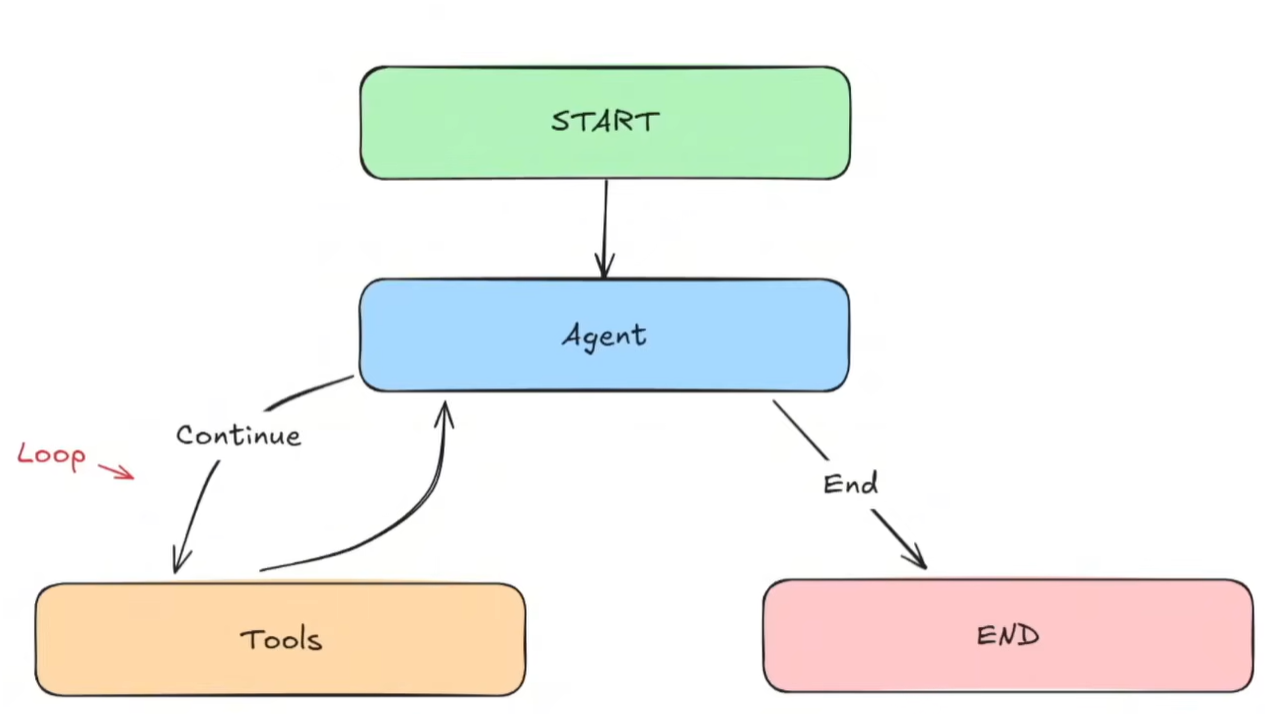

In [ ]:
from typing import Annotated, Sequence, TypedDict

from langchain_core.messages import BaseMessage # Foundational class for all message types in LangGraph
from langchain_core.messages import ToolMessage # Passes data back to LLm after it calls a tool such as the content and tool_call_id
from langchain_core.messages import SystemMessage # Message for providing instructions to the LLM
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from langgraph.graph.message import add_messages # Reducer Function, appends messages without overwritting previous messages
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode

In [ ]:
class AgentState(TypedDict):
  messages: Annotated[Sequence[BaseMessage], add_messages]

In [ ]:
@tool
def add(a: int, b:int):
  """This is an addition function that adds 2 numbers together"""
  return a + b

@tool
def subtract(a: int, b: int):
    """Subtraction function"""
    return a - b

@tool
def multiply(a: int, b: int):
    """Multiplication function"""
    return a * b

In [ ]:
tools = [add, subtract, multiply]

In [ ]:
model = ChatOpenAI(model = "gpt-4o").bind_tools(tools)

In [ ]:
def model_call(state: AgentState) -> AgentState:
  system_prompt = SystemMessage(
      content="You are my AI assitant, please answer my query to the best of your ability."
  )
  response = model.invoke([system_prompt] + state["messages"])
  return {"messages":[response]}

In [ ]:
def should_continue(state: AgentState):
  messages = state["messages"]
  last_message = messages[-1]
  if not last_message.tool_calls:
    return "end"
  else:
    return "continue"

In [ ]:
graph = StateGraph(AgentState)

# Normal Node
graph.add_node("our_agent", model_call)

# Tool Node
tool_node = ToolNode(tools=tools)
graph.add_node("tools", tool_node)

graph.set_entry_point("our_agent")

graph.add_conditional_edges(
    "our_agent",
    should_continue,
    {
        "continue": "tools",
        "end": END
    }
)

graph.add_edge("tools", "our_agent")

app = graph.compile()

In [ ]:
def print_stream(stream):
  for s in stream:
    message = s["messages"][-1]
    if isinstance(message, tuple):
      print(message)
    else:
      message.pretty_print()

In [ ]:
inputs = {"messages":[('user', "Add 3 + 4 and then add 55 + 66")]}  # Tool is called twice due to looping
print_stream(app.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Add 3 + 4 and then add 55 + 66
================================== Ai Message ==================================
Tool Calls:
  add (call_RlB1UgXIgwFgvByhuYUI7KJF)
 Call ID: call_RlB1UgXIgwFgvByhuYUI7KJF
  Args:
    a: 3
    b: 4
  add (call_Eb8mDNPZppksVb27g0407lp3)
 Call ID: call_Eb8mDNPZppksVb27g0407lp3
  Args:
    a: 55
    b: 66
================================= Tool Message =================================
Name: add

121
================================== Ai Message ==================================

The result of adding 3 + 4 is 7, and the result of adding 55 + 66 is 121.


In [ ]:
# Agent uses multiple tools
inputs = {"messages": [("user", "Add 40 + 12 and then multiply the result by 6. Also tell me a joke please.")]}
print_stream(app.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Add 40 + 12 and then multiply the result by 6. Also tell me a joke please.
================================== Ai Message ==================================
Tool Calls:
  add (call_uYkc9Bxg71SdCLrGlouefqNW)
 Call ID: call_uYkc9Bxg71SdCLrGlouefqNW
  Args:
    a: 40
    b: 12
================================= Tool Message =================================
Name: add

52
================================== Ai Message ==================================
Tool Calls:
  multiply (call_Zoa3I9cp2lLqmnHOkkoMaOFE)
 Call ID: call_Zoa3I9cp2lLqmnHOkkoMaOFE
  Args:
    a: 52
    b: 6
================================= Tool Message =================================
Name: multiply

312
================================== Ai Message ==================================

The result of \( (40 + 12) \times 6 \) is 312.

And here's a joke for you: Why don’t skeletons fight each other? They don’t have the guts!


## Agent 4: Dcoument Drafter
- A `Fast` agentic AI system that can speed up drafting documents, emails etc and save them afterwards.
- `Continuous Feedback`: The Agentic system will have Human-AI Collaboration and should stop when the user(Human) is ok with the draft.


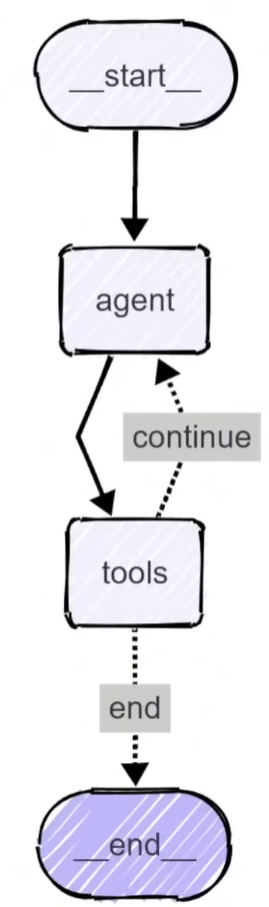

In [ ]:
from typing import Annotated, Sequence, TypedDict

from langchain_core.messages import BaseMessage, HumanMessage, AIMessage, ToolMessage, SystemMessage
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode

In [ ]:
import os
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")

In [ ]:
# This is the global variable to store document content
document_content = ""

In [ ]:
class AgentState(TypedDict):
  messages: Annotated[Sequence[BaseMessage], add_messages]

In [ ]:
@tool
def update(content: str) -> str: # Note: the pramas are provided by the LLM model
  """Updates the document with the provided content"""
  global document_content
  document_content = content # udate the document

  return f"Document has been updated successfully! The current content is: \n {document_content}"

@tool
def save(filename: str) -> str:
  """Save the current document to a text file and finish the process.
  Args:
    filename: Name for the text file.
  """
  global document_content

  if not filename.endswith(".txt"):
    filename += f"{filename}.txt"

  try:
    with open(filename, 'w') as file:
      file.write(document_content)
    print(f"\n💾 Document has been saved to: {filename}")
    return f"Document has been saved successfully to {filename}"
  except Exception as e:
    return f"\n❌ Error saving document: {str(e)}"

In [ ]:
tools = [update, save]

In [ ]:
model = ChatOpenAI(model = "gpt-4o").bind_tools(tools)

In [ ]:
def our_agent(state: AgentState) -> AgentState:
  system_prompt = SystemMessage(
      content= f"""
       You are Drafter, a helpful writing assistant. You are going to help the user update and modify documents.

        - If the user wants to update or modify content, use the 'update' tool with the complete updated content.
        - If the user wants to save and finish, you need to use the 'save' tool.
        - Make sure to always show the current document state after modifications.

        The current document content is:{document_content}
      """)

  if not state["messages"]:
    user_input = "I'm ready to help you update a document. What would you like to create?"
    user_message = HumanMessage(content = user_input)
  else:
    user_input = input("\n What would you like to do with the document? ")
    print(f"\n👤 USER: {user_input}")
    user_message = HumanMessage(content = user_input)

  all_messages = [system_prompt] + list(state["messages"]) + [user_message]

  response = model.invoke(all_messages)

  print(f"\n🤖 AI: {response.content}")
  if hasattr(response, "tool_calls") and response.tool_calls:
    print(f"🔧 USING TOOLS: {[ [tc['name']] for tc in response.tool_calls]}")

  return {"messages": list(state["messages"]) + [user_message, response]}

In [ ]:
def should_continue(state: AgentState) -> str:
  """Determine if we shoudl continue or end the conversation."""
  messages = state["messages"]

  if not messages:
    "continue"

  # Look for the most recent tool message...
  for message in reversed(messages):
    # ... and check if this is a ToolMessage resulting from 'save' tool
    if (isinstance(message, ToolMessage) and
        "saved" in message.content.lower() and
        "document" in message.content.lower()):
        return "end" # Goes to end edge which leads to endpoint

    # Else
    return "continue"

In [ ]:
def print_message(messages):
  """Function to print the messages in a more  readable format"""
  if not messages:
    return

  for message in messages:
    if isinstance(message, ToolMessage):
      print(f"\n🛠️ TOOL RESULT: {message.content}")

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("agent", our_agent)
graph.add_node("tools", ToolNode(tools))

graph.set_entry_point("agent")
graph.add_edge("agent", "tools")

graph.add_conditional_edges(
    "tools",
    should_continue,
    {
        "continue": "agent",
        "end": END
    },
)

app = graph.compile()

In [ ]:
def run_document_agent():
  print("\n ======= DOCUMENT DRAFTER ========")

  state = {"messages": []}  # Here we can upload any document for context

  for step in app.stream(state, stream_mode="values"):  # invoke the graph
    if "messages" in step:
      print_message(step["messages"])

  print("\n ====== DRAFTER FINISHED ========")

In [ ]:
if __name__ == "__main__":
  run_document_agent()


 ======= DOCUMENT DRAFTER ========

🤖 AI: Please let me know what content you would like to start or any specific updates you need in a document, and I can help you create or modify it.

 What would you like to do with the document? Write an email to tom saying i cannot make it

👤 USER: Write an email to tom saying i cannot make it

🤖 AI: 
🔧 USING TOOLS: [['update']]

🛠️ TOOL RESULT: Document has been updated successfully! The current content is: 
 Subject: Unable to Attend

Hi Tom,

I hope this message finds you well. I am writing to let you know that I will not be able to make it. Unfortunately, unforeseen circumstances have come up, and I need to attend to them.

I apologize for any inconvenience this may cause.

Thank you for your understanding.

Best regards,

[Your Name]

 What would you like to do with the document? make sure to mention that the meeting was supposed to be at 10:00 am .

👤 USER: make sure to mention that the meeting was supposed to be at 10:00 am .

🤖 AI: 
🔧 USI

## Agent 5: RAG

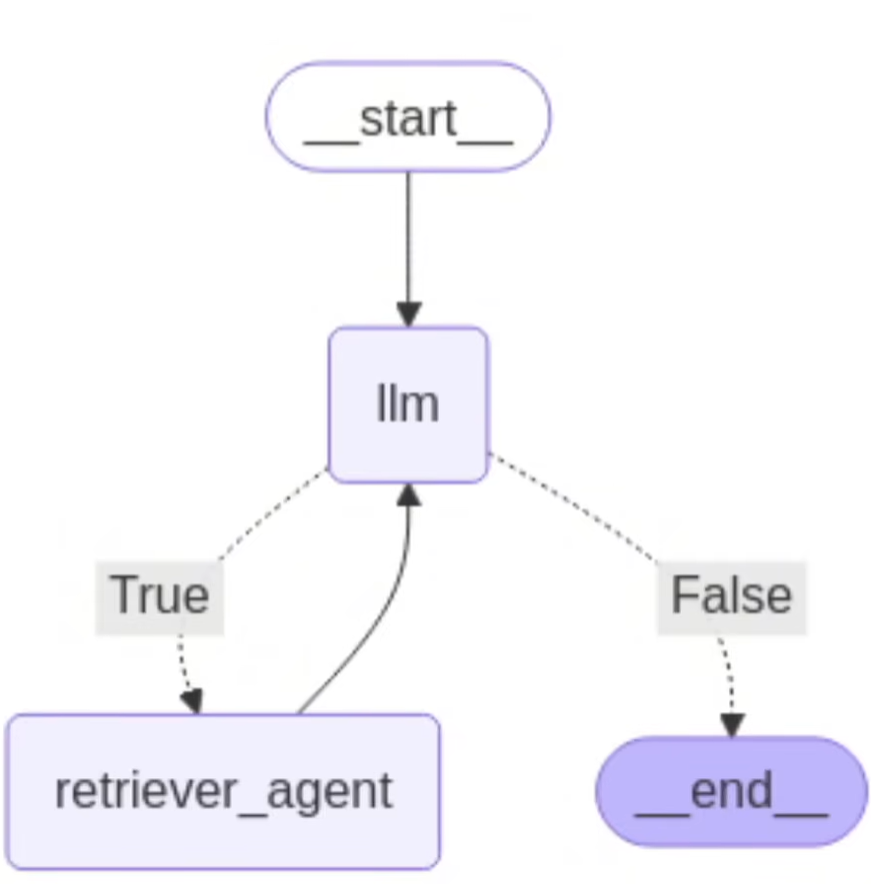

In [56]:
import os
from typing import TypedDict, Annotated, Sequence

from langchain_core.messages import BaseMessage, HumanMessage, SystemMessage, AIMessage, ToolMessage
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langgraph.graph import StateGraph, END

from operator import add as add_messages

In [57]:
llm = ChatOpenAI(
    model="gpt-4o", temperature = 0) # To minimize hallucination - temperature = 0 makes the model output more deterministic


In [58]:
# Our Embedding Model - has to also be compatible with the LLM
embeddings = OpenAIEmbeddings(
    model="text-embedding-3-small",
)

In [59]:
pdf_path = "/content/drive/MyDrive/data/rag_agent/Stock_Market_Performance_2024.pdf"

In [60]:
if not os.path.exists(pdf_path):
    raise FileNotFoundError(f"PDF file not found: {pdf_path}")

In [61]:
! pip install pypdf

In [62]:
pdf_loader = PyPDFLoader(pdf_path) # This loads the PDF

In [63]:
# Checks if the PDF is there
try:
    pages = pdf_loader.load()
    print(f"PDF has been loaded and has {len(pages)} pages")
except Exception as e:
    print(f"Error loading PDF: {e}")
    raise

PDF has been loaded and has 9 pages


In [64]:
# Chunking Process
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200
)


In [65]:
pages_split = text_splitter.split_documents(pages) # We now apply this to our pages

In [66]:
persist_directory = "/content/drive/MyDrive/data/rag_agent"
collection_name = "stock_market"

In [67]:
# If our collection does not exist in the directory, we create using the os command
if not os.path.exists(persist_directory):
    os.makedirs(persist_directory)

In [68]:
try:
    # Here, we actually create the chroma database using our embeddigns model
    vectorstore = Chroma.from_documents(
        documents=pages_split,
        embedding=embeddings,
        persist_directory=persist_directory,
        collection_name=collection_name
    )
    print(f"Created ChromaDB vector store!")
except Exception as e:
    print(f"Error setting up ChromaDB: {str(e)}")
    raise

Created ChromaDB vector store!


In [69]:
# Now we create our retriever
retriever = vectorstore.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 5} # K is the amount of chunks to return
)

In [70]:
@tool
def retriever_tool(query: str) -> str:
    """
    This tool searches and returns the information from the Stock Market Performance 2024 document.
    """

    docs = retriever.invoke(query)

    if not docs:
        return "I found no relevant information in the Stock Market Performance 2024 document."

    results = []
    for i, doc in enumerate(docs):
        results.append(f"Document {i+1}:\n{doc.page_content}")

    return "\n\n".join(results)

In [71]:
tools = [retriever_tool]
llm = llm.bind_tools(tools)

In [72]:
class AgentState(TypedDict):
  messages : Annotated[Sequence[BaseMessage], add_messages]

In [73]:
def should_continue(state: AgentState):
  """Check if the last message contains tool calls."""
  result = state["messages"][-1]
  return hasattr(result, 'tool_calls') and len(result.tool_calls) > 0

In [74]:
system_prompt = """
You are an intelligent AI assistant who answers questions about Stock Market Performance in 2024 based on the PDF document loaded into your knowledge base.
Use the retriever tool available to answer questions about the stock market performance data. You can make multiple calls if needed.
If you need to look up some information before asking a follow up question, you are allowed to do that!
Please always cite the specific parts of the documents you use in your answers.
"""

In [75]:
tools_dict = {our_tool.name: our_tool for our_tool in tools} # Creating a dictionary of tools

In [76]:
# LLM Agent
def call_llm(state: AgentState) -> AgentState:
  """Function to call the LLM with the current state"""
  messages = list(state["messages"])
  messages = [SystemMessage(content=system_prompt)] + messages
  message = llm.invoke(messages)
  return {"messages": [message]}

In [77]:
# Retriver Agent
def take_action(state: AgentState) -> AgentState:
    """Execute tool calls from the LLM's response."""

    tool_calls = state['messages'][-1].tool_calls
    results = []
    for t in tool_calls:
        print(f"Calling Tool: {t['name']} with query: {t['args'].get('query', 'No query provided')}")

        if not t['name'] in tools_dict: # Checks if a valid tool is present
            print(f"\nTool: {t['name']} does not exist.")
            result = "Incorrect Tool Name, Please Retry and Select tool from List of Available tools."
        else:
            result = tools_dict[t['name']].invoke(t['args'].get('query', ''))
            print(f"Result length: {len(str(result))}")

        # Appends the Tool Message
        results.append(ToolMessage(tool_call_id=t['id'], name=t['name'], content=str(result)))

    print("Tools Execution Complete. Back to the model!")
    return {'messages': results}

In [78]:
graph = StateGraph(AgentState)

graph.add_node("llm", call_llm)
graph.add_node("retriever_agent", take_action)

graph.add_conditional_edges(
    "llm",
    should_continue,
    {
        True: "retriever_agent",
        False: END
    }
)

graph.add_edge("retriever_agent", "llm")
graph.set_entry_point("llm")

rag_agent = graph.compile()

In [83]:
def running_agent():
  print("\n=== RAG AGENT ===")

  while True:
    user_input = input("\nWhat is your question: ")
    if user_input.lower() in ['exit', 'quit']:
      break

    messages = [HumanMessage(content = user_input)]

    result = rag_agent.invoke({"messages": messages})

    print("\n=== ANSWER ===")
    print(result['messages'][-1].content)

In [85]:
if __name__ == "__main__":
  running_agent()


=== RAG AGENT ===

What is your question: exit
